In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import sys
sys.path.append('../python')
import dataPython as dp
import scipy.interpolate as inter

from datetime import datetime
import scipy.integrate as si
import noordermeer as noord
import time

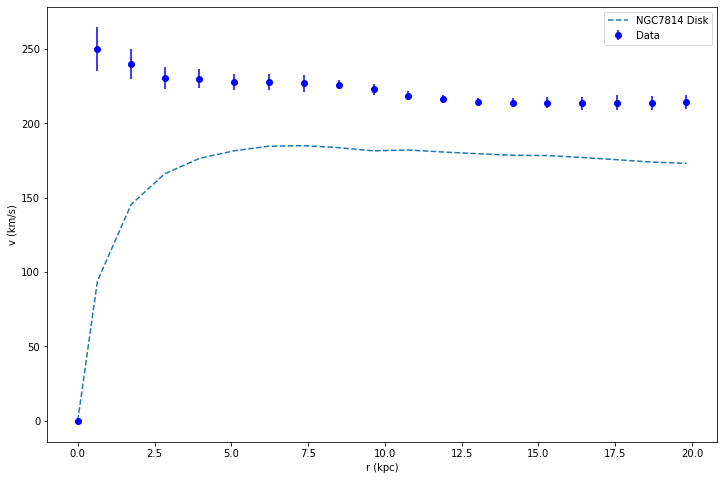

In [7]:
'''
source: 
https://www.aanda.org/articles/aa/pdf/2011/07/aa16634-11.pdf
run in gipsy
Zlaw = sech-squared ???
Z0=.88 kpc (paper table 4 gives hz=.44kpc where z0=2*hz)
D=14.6 Mpc (paper table 1)
density profile Y
UNITS=kpc,mag/arcsec**2
RADDENS=<NGC7814disk4
MASS=80 ???? (setllar mass??)
RADII=0,0.64,1.74,2.83,3.96,5.10,6.23,7.36,8.49,9.63,10.76,11.89,13.02,14.16,15.29,16.42,17.55,18.69,19.82
(same points as raw data, table 3)
'''

data = dp.getXYdata_wXYerr('ngc7814data')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err1 = np.asarray(data['ey'])

dat2_import = dp.getXYZdata('hoop2.dat')
r2 = dat2_import['xx']
v2_file = dat2_import['zz']

plt.figure(figsize=(12,8))

plt.plot(r2,2.2*np.asarray(v2_file),'--',label='NGC7814 Disk')
plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.legend()
plt.show()


## paper uses extrapolated photometric profile (fig 7), not the actual points (provided by sparc)????

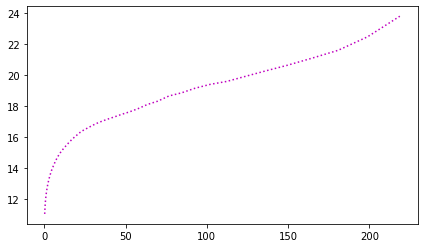

In [3]:
fromplot_import = dp.getXYdata('NGC7814disk4.rcl')
r_fromplot = fromplot_import['xx']
v_fromplot = fromplot_import['yy']

plt.figure(figsize=(7,4))

plt.plot(r_fromplot,v_fromplot,':',color='m',markersize=10,label='Sparc photometric profile of disk')